In [1]:
# allows to bring all the functions, classes, and variables defined in the "utils" module into the current namespace.
from utils import *

In [5]:
# Read dataset
data=pd.read_csv("StructuredData.csv")
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.003256,0.000000,0.000000,0.003256,0.000000,0.000000,0.000000,0.000602,0.000000,0.000000,...,0.798569,1.000000,0.768782,0.000000,0.200936,0.804741,0.019510,0.000000,0.523966,0.175045
1,0.014240,0.022475,0.039761,0.014240,0.013658,0.096678,0.071781,0.097262,0.013582,0.013474,...,0.798569,1.000000,0.768782,0.000000,0.200936,0.804741,0.019510,0.000000,0.523966,2.762850
2,0.023741,0.009990,0.004968,0.023741,0.003704,0.004503,0.006012,0.004993,0.002277,0.004954,...,0.798569,1.000000,0.768782,0.000000,0.200936,0.804741,0.019510,0.000000,0.523966,0.189137
3,0.004936,0.013600,0.011396,0.004936,0.009726,0.012003,0.009310,0.012586,0.010308,0.008897,...,0.798569,1.000000,0.768782,0.000000,0.200936,0.804741,0.019510,0.000000,0.523966,0.758229
4,0.021674,0.029782,0.043020,0.021674,0.008370,0.036438,0.039059,0.036978,0.011597,0.009532,...,0.798569,1.000000,0.768782,0.000000,0.200936,0.804741,0.019510,0.000000,0.523966,1.598440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.695810,0.538335,0.210589,0.695810,0.244818,0.223355,0.358896,0.215072,0.319602,0.303072,...,0.496467,0.719654,0.400288,0.587638,0.000000,0.391111,0.488881,0.821339,0.695957,10.102800
2996,0.452808,0.718125,0.410841,0.452808,0.479193,0.353673,0.576102,0.352000,0.523090,0.540917,...,0.496467,0.719654,0.400288,0.587638,0.000000,0.391111,0.488881,0.821339,0.695957,13.791100
2997,0.418226,0.479228,0.428822,0.418226,0.219375,0.222539,0.386697,0.215348,0.172006,0.180253,...,0.496467,0.719654,0.400288,0.587638,0.000000,0.391111,0.488881,0.821339,0.695957,8.632730
2998,0.359044,0.420201,0.569950,0.359044,0.246977,0.322191,0.519423,0.319674,0.152907,0.174422,...,0.496467,0.719654,0.400288,0.587638,0.000000,0.391111,0.488881,0.821339,0.695957,12.019800


In [41]:
X = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1].to_numpy()
y=y.reshape(-1)
y.shape

(3000,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (2400, 49)
y_train.shape: (2400,)
X_test.shape: (600, 49)
y_test.shape: (600,)


In [10]:
# Scaling Transform using StandardScaler to standardize the features
scaler = StandardScaler()

# PolynomialTransform using PolynomialFeatures to create polynomial features from the original features
poly = PolynomialFeatures()

# Polynomial Ridge Regression model using Ridge regression for polynomial regression with regularization
reg = Ridge()

# Creating a pipeline for the Polynomial Ridge Regression model with scaler, poly, and reg as steps
polyn_model = Pipeline([("scaler", scaler), ("poly", poly), ("reg", reg)])

# Hyperparameter Optimization
# Defining the hyperparameter grid for Polynomial Ridge Regression
param_grid = [
    {
        "poly__degree": [2, 3, 4, 5, 6, 7, 8, 9, 10],  # Degree of polynomial features to consider
        "reg__alpha": np.logspace(-3, 3, 7),  # Range of alpha values for Ridge regularization
    },
]

# Models for hyperparameter optimization, in this case, only polyn_model is considered
models = [polyn_model]
names = ['polyn_model'] 

# Dictionary to store the best hyperparameters for each model
search_bestparams = {}

# Hyperparameter optimization using GridSearchCV for each model
for i, (name, model) in enumerate(zip(names, models)):
    search = GridSearchCV(model, param_grid[i], cv=5, scoring='explained_variance')
    search.fit(X_train, y_train)
    best_params = search.best_params_
    search_bestparams[name] = best_params

# Reconstructing the polynomial regression model with the optimized hyperparameters
# Extracting the optimized hyperparameters for polyn_model
poly_degree = search_bestparams['polyn_model']['poly__degree']
alpha = search_bestparams['polyn_model']['reg__alpha']

# Rebuilding the polyn_model with the optimized hyperparameters
polyn_model = Pipeline([("scaler", scaler), ("poly", PolynomialFeatures(degree=poly_degree)), 
                        ("reg", Ridge(alpha=alpha))])


best parameters: {'polyn_model': {'poly__degree': 2, 'reg__alpha': 10.0}}


In [38]:
# We can have many target coverage levels and save results! Here, we only set the coverage level as 95%.
# The functions to calculate prediction intervals are stored in the 'funcs' list, and their corresponding names are stored in the 'names' list.
levels = [0.1, 0.05, 0.01]  # Three target quantiles: 0.1, 0.05, 0.01  (three target coverage levels: 90%, 95%, 99%)
funcs = [jackknife, jackknife_plus, weighted_jackknife_plus, CV, CV_plus, weighted_CV_plus]
names = ['J', 'J+', 'WJ+', 'CV', 'CV+', 'WCV+']
results = {}
# Calculate the prediction intervals for each function and coverage level
for name, func in zip(names,funcs):
    res=[]
    for level in levels:
        result=func(X_train,y_train,X_test,y_test,alpha=level) #X_train,y_train,X_test,y_test
        res.append(result)
    results[name]=res

In [14]:
results

{'J': [[[0.1,
    0.895,
    2.456,
    array([[10.73192286, 13.18821858],
           [ 8.17490743, 10.63120316],
           [ 2.29397652,  4.75027225],
           ...,
           [-1.06171995,  1.39457578],
           [ 7.01551828,  9.47181401],
           [-0.17143825,  2.28485748]])]],
  [[0.05,
    0.943,
    3.709,
    array([[10.10550687, 13.81463457],
           [ 7.54849145, 11.25761914],
           [ 1.66756054,  5.37668823],
           ...,
           [-1.68813593,  2.02099177],
           [ 6.3891023 , 10.09822999],
           [-0.79785423,  2.91127347]])]],
  [[0.01,
    0.978,
    6.763,
    array([[ 8.57873267, 15.34140877],
           [ 6.02171724, 12.78439334],
           [ 0.14078634,  6.90346244],
           ...,
           [-3.21491013,  3.54776597],
           [ 4.86232809, 11.62500419],
           [-2.32462843,  4.43804767]])]]],
 'J+': [[[0.1,
    0.893,
    2.453,
    array([[10.73964436, 13.18519113],
           [ 8.17799411, 10.63367709],
           [ 2.2944669

In [18]:
# Organize the results into a DataFrame with appropriate column names
d=results
a=pd.DataFrame(list(zip(y_test,
                        d['J'][0][0][3][:,0], d['J'][0][0][3][:,1],
                        d['J'][1][0][3][:,0], d['J'][1][0][3][:,1],
                        d['J'][2][0][3][:,0], d['J'][2][0][3][:,1],
                        d['J+'][0][0][3][:,0], d['J+'][0][0][3][:,1],
                        d['J+'][1][0][3][:,0], d['J+'][1][0][3][:,1],
                        d['J+'][2][0][3][:,0], d['J+'][2][0][3][:,1],
                        d['WJ+'][0][0][3][:,0],d['WJ+'][0][0][3][:,1],
                        d['WJ+'][1][0][3][:,0],d['WJ+'][1][0][3][:,1],
                        d['WJ+'][2][0][3][:,0],d['WJ+'][2][0][3][:,1],

                        d['CV'][0][0][3][:,0], d['CV'][0][0][3][:,1],
                        d['CV'][1][0][3][:,0], d['CV'][1][0][3][:,1],
                        d['CV'][2][0][3][:,0], d['CV'][2][0][3][:,1],
                        d['CV+'][0][0][3][:,0], d['CV+'][0][0][3][:,1],
                        d['CV+'][1][0][3][:,0], d['CV+'][1][0][3][:,1],
                        d['CV+'][2][0][3][:,0], d['CV+'][2][0][3][:,1],
                        d['WCV+'][0][0][3][:,0],d['WCV+'][0][0][3][:,1],
                        d['WCV+'][1][0][3][:,0],d['WCV+'][1][0][3][:,1],
                        d['WCV+'][2][0][3][:,0],d['WCV+'][2][0][3][:,1],   
                       
                       )),
               columns=['y_test',
                        'j_10low','j_10up',
                        'j_5low','j_5up',
                        'j_1low','j_1up',
                        'j_P_10low','j_P_10up',
                        'j_P_5low','j_P_5up',
                        'j_P_1low','j_P_1up',
                        'Wj_10low','Wj_10up',
                        'Wj_5low','Wj_5up',
                        'Wj_1low','Wj_1up',
                        
                        'CV_10low','CV_10up',
                        'CV_5low','CV_5up',
                        'CV_1low','CV_1up',                   
                        'CV_P_10low','CV_P_10up',
                        'CV_P_5low','CV_P_5up',
                        'CV_P_1low','CV_P_1up',
                        'WCV_10low','WCV_10up',
                        'WCV_5low','WCV_5up',
                        'WCV_1low','WCV_1up',
                        ])
a

,y_test,j_10low,j_10up,j_5low,j_5up,j_1low,j_1up,j_P_10low,j_P_10up,j_P_5low,...,CV_P_5low,CV_P_5up,CV_P_1low,CV_P_1up,WCV_10low,WCV_10up,WCV_5low,WCV_5up,WCV_1low,WCV_1up
0,10.127200,10.731923,13.188219,10.105507,13.814635,8.578733,15.341409,10.739644,13.185191,10.123557,...,10.107055,13.841413,8.544561,15.385164,10.714948,13.204081,10.148017,13.782407,8.482225,15.478457
1,10.012100,8.174907,10.631203,7.548491,11.257619,6.021717,12.784393,8.177994,10.633677,7.550402,...,7.536875,11.281426,5.949883,12.843712,8.154726,10.651958,7.528775,11.267994,5.670997,13.122598
2,3.949060,2.293977,4.750272,1.667561,5.376688,0.140786,6.903462,2.294467,4.748651,1.659638,...,1.648017,5.397184,0.096166,6.944778,2.482373,4.570068,1.989119,5.041486,0.556408,6.499660
3,1.646580,0.539553,2.995849,-0.086863,3.622265,-1.613637,5.149039,0.540623,2.994844,-0.086790,...,-0.092064,3.634097,-1.672404,5.203526,0.909384,2.625526,0.542804,2.984395,-0.177243,3.717670
4,3.307080,2.398583,4.854879,1.772167,5.481295,0.245393,7.008069,2.398809,4.852386,1.753872,...,1.749345,5.481665,0.204984,7.058189,2.427530,4.819398,1.967532,5.318366,0.808804,6.358844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.453930,0.049282,2.505578,-0.577134,3.131994,-2.103908,4.658768,0.050654,2.495047,-0.575551,...,-0.583559,3.137128,-2.169615,4.689610,0.298564,2.241230,-0.100676,2.664824,-1.540279,4.037422
596,1.818730,0.722207,3.178502,0.095791,3.804918,-1.430984,5.331693,0.721632,3.179349,0.098497,...,0.061604,3.812196,-1.503297,5.346521,0.816580,3.088884,0.219238,3.696695,-1.304866,5.239111
597,0.226507,-1.061720,1.394576,-1.688136,2.020992,-3.214910,3.547766,-1.061673,1.394514,-1.686955,...,-1.694637,2.031461,-3.275040,3.600890,-0.676192,1.002246,-1.024065,1.357573,-1.744859,2.086588
598,7.161750,7.015518,9.471814,6.389102,10.098230,4.862328,11.625004,7.014917,9.471213,6.389879,...,6.374514,10.116298,4.824166,11.670677,7.100469,9.400957,6.530432,9.942080,5.025008,11.590732


The code provided sorts the DataFrame 'a' by the values in the 'y_test' column in ascending order. This will arrange the rows of the DataFrame based on the increasing order of the true test values.
The DataFrame 'a' will be sorted in ascending order of the 'y_test' values.

In [19]:
a_sort=a.sort_values(by=['y_test'])
a_sort

,y_test,j_10low,j_10up,j_5low,j_5up,j_1low,j_1up,j_P_10low,j_P_10up,j_P_5low,...,CV_P_5low,CV_P_5up,CV_P_1low,CV_P_1up,WCV_10low,WCV_10up,WCV_5low,WCV_5up,WCV_1low,WCV_1up
15,0.099505,-1.152317,1.303979,-1.778733,1.930394,-3.305507,3.457169,-1.151748,1.304385,-1.779435,...,-1.788191,1.935589,-3.358311,3.515439,-0.771850,0.927665,-1.104483,1.251482,-1.937803,2.092835
247,0.100334,-1.059863,1.396433,-1.686279,2.022849,-3.213053,3.549623,-1.060586,1.395710,-1.688699,...,-1.695303,2.028477,-3.267737,3.601623,-0.674858,1.020585,-1.046461,1.395573,-1.883934,2.234114
370,0.110603,-1.145728,1.310568,-1.772144,1.936984,-3.298918,3.463758,-1.145533,1.308217,-1.773361,...,-1.782633,1.945128,-3.356964,3.518967,-0.797217,0.958353,-1.180914,1.341214,-1.998585,2.184286
216,0.119904,-0.943381,1.512915,-1.569797,2.139331,-3.096571,3.666105,-0.943394,1.509724,-1.569070,...,-1.574488,2.149558,-3.156837,3.718988,-0.651898,1.226703,-1.148443,1.711507,-2.218322,2.784056
169,0.121558,-1.168781,1.287515,-1.795197,1.913931,-3.321971,3.440705,-1.168636,1.286847,-1.794418,...,-1.803573,1.919775,-3.386726,3.489204,-0.767442,0.883890,-1.104924,1.228485,-1.830257,1.957601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,27.177500,25.008776,27.465072,24.382360,28.091488,22.855586,29.618262,25.013583,27.456135,24.335759,...,24.322895,28.134903,22.729799,29.913734,24.793385,27.688487,23.980921,28.489921,21.435274,30.958559
449,28.003700,25.415681,27.871977,24.789265,28.498393,23.262491,30.025167,25.413931,27.871499,24.794617,...,24.772942,28.516676,23.237882,30.108392,25.305040,27.963912,24.613685,28.659121,22.822931,30.422453
266,30.285400,30.320957,32.777253,29.694541,33.403669,28.167767,34.930443,30.316957,32.769930,29.680051,...,29.663795,33.402283,28.004396,34.954730,30.165327,32.924097,29.353260,33.738327,27.432240,35.634326
530,32.623000,33.751065,36.207361,33.124649,36.833777,31.597875,38.360551,33.745117,36.197852,33.125947,...,33.069215,36.851353,31.499785,38.416623,33.560653,36.377910,32.648586,37.276147,30.407218,39.664737


# Confidence Level=95%

the code helps in analyzing the performance of different strategies (jackknife, jackknife_plus, weighted_jackknife_plus, CV, CV_plus, and weighted_CV_plus) based on their coverage and width within specific bins of 'y_test' values.

The code provided processes the DataFrame 'a_sort' to obtain coverage and width values for different strategies based on bins defined by quantiles of 'y_test' values. The code creates a dictionary 'r' with arrays containing the lower and upper bounds of prediction intervals for each strategy. It then defines a function 'get_coverages_widths_by_bins' that calculates coverage and width for each strategy within specified bins.

Here's the explanation for the code:

y_testt = a_sort.y_test.values: Extracts the 'y_test' values from the sorted DataFrame 'a_sort' and stores them in the 'y_testt' variable.

r = {}: Initializes an empty dictionary 'r' to store arrays containing the lower and upper bounds of prediction intervals for each strategy.

r['J'] = np.array(a_sort[['j_5low', 'j_5up']]): Extracts the lower and upper bounds of prediction intervals for the strategy 'J' (jackknife) from the sorted DataFrame 'a_sort' and stores them in a NumPy array in the 'r' dictionary.

Similar steps are performed for other strategies: 'J+' (jackknife_plus), 'WJ+' (weighted_jackknife_plus), 'CV' (CV), 'CV+' (CV_plus), and 'WCV+' (weighted_CV_plus).

names = ['J', 'J+', 'WJ+', 'CV', 'CV+', 'WCV+']: Initializes a list 'names' containing the names of the strategies.

def get_coverages_widths_by_bins(want, y_testt, r, a_sort, names, bins): Defines a function that calculates coverage or width values for each strategy within specified bins. The 'want' parameter specifies whether coverage or width is desired. The 'y_testt' is the true test values, 'r' is the dictionary containing the lower and upper bounds of prediction intervals for each strategy, 'a_sort' is the sorted DataFrame, 'names' is the list of strategy names, and 'bins' defines the bins based on quantiles of 'y_test' values.

The function calculates coverage and width for each strategy within the specified bins and stores the results in the 'recap' dictionary.

The function returns a DataFrame 'recap_df' containing the coverage or width values for each strategy within the specified bins.

In [20]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [21]:
y_testt=a_sort.y_test.values
r={}
r['J']=np.array(a_sort[['j_5low','j_5up']])
r['J+']=np.array(a_sort[['j_P_5low','j_P_5up']])
r['WJ+']=np.array(a_sort[['Wj_5low','Wj_5up']])
r['CV']=np.array(a_sort[['CV_5low','CV_5up']])
r['CV+']=np.array(a_sort[['CV_P_5low','CV_P_5up']])
r['WCV+']=np.array(a_sort[['WCV_5low','WCV_5up']])

names=['J','J+','WJ+','CV' , 'CV+' ,'WCV+']
def get_coverages_widths_by_bins(want,y_testt, r, a_sort, names, bins):
    cuts = []
    cuts_ = pd.qcut(y_testt, bins).unique()[:-1]
    for item in cuts_:
        cuts.append(item.left)
    cuts.append(cuts_[-1].right)
    cuts.append(np.max(y_test)+1)
    
    recap = {}
    for i in range(len(cuts)-1):
        cut1, cut2 = cuts[i], cuts[i+1]
        name = f"[{np.round(cut1, 2)}, {np.round(cut2, 2)}]"
        recap[name] = []
        for strategy in names:
            indices = np.where((y_testt >= cuts[i]) * (y_testt <= cuts[i+1]))
            y_test_trunc = np.take(y_testt, indices)
            y_low_ = np.take(r[strategy][:,0], indices)
            y_high_ = np.take(r[strategy][:,1], indices)
            score_coverage = regression_coverage_score(
                y_test_trunc[0], y_low_[0], y_high_[0]
            )
            width=( y_high_[0] - y_low_[0]).mean().round(3)
            if want == "coverage":
                recap[name].append(score_coverage)
            elif want == "width":
                recap[name].append(width)
    recap_df = pd.DataFrame(recap, index=names)
    return recap_df


The code provided generates a grouped bar plot with two subplots (side by side). Each subplot represents a different metric ('Effective Coverage' and 'Prediction Interval Width'). The plot displays the performance of various strategies ('J', 'J+', 'WJ+', 'CV', 'CV+', 'WCV+') at different target coverage levels (0.9, 0.95, and 0.99). Let's go through the code with comments:



This code creates a bar plot with two subplots to compare the performance of different strategies ('J', 'J+', 'WJ+', 'CV', 'CV+', 'WCV+') based on their effective coverage and prediction interval width at different target coverage levels (0.9, 0.95, and 0.99). The first subplot shows the 'Effective Coverage', and the second subplot shows the 'Prediction Interval Width'. Horizontal lines and text annotations indicate the target coverage levels. Each subplot contains bars representing the performance of the strategies for each target coverage level. The legend displays the labels for each strategy.

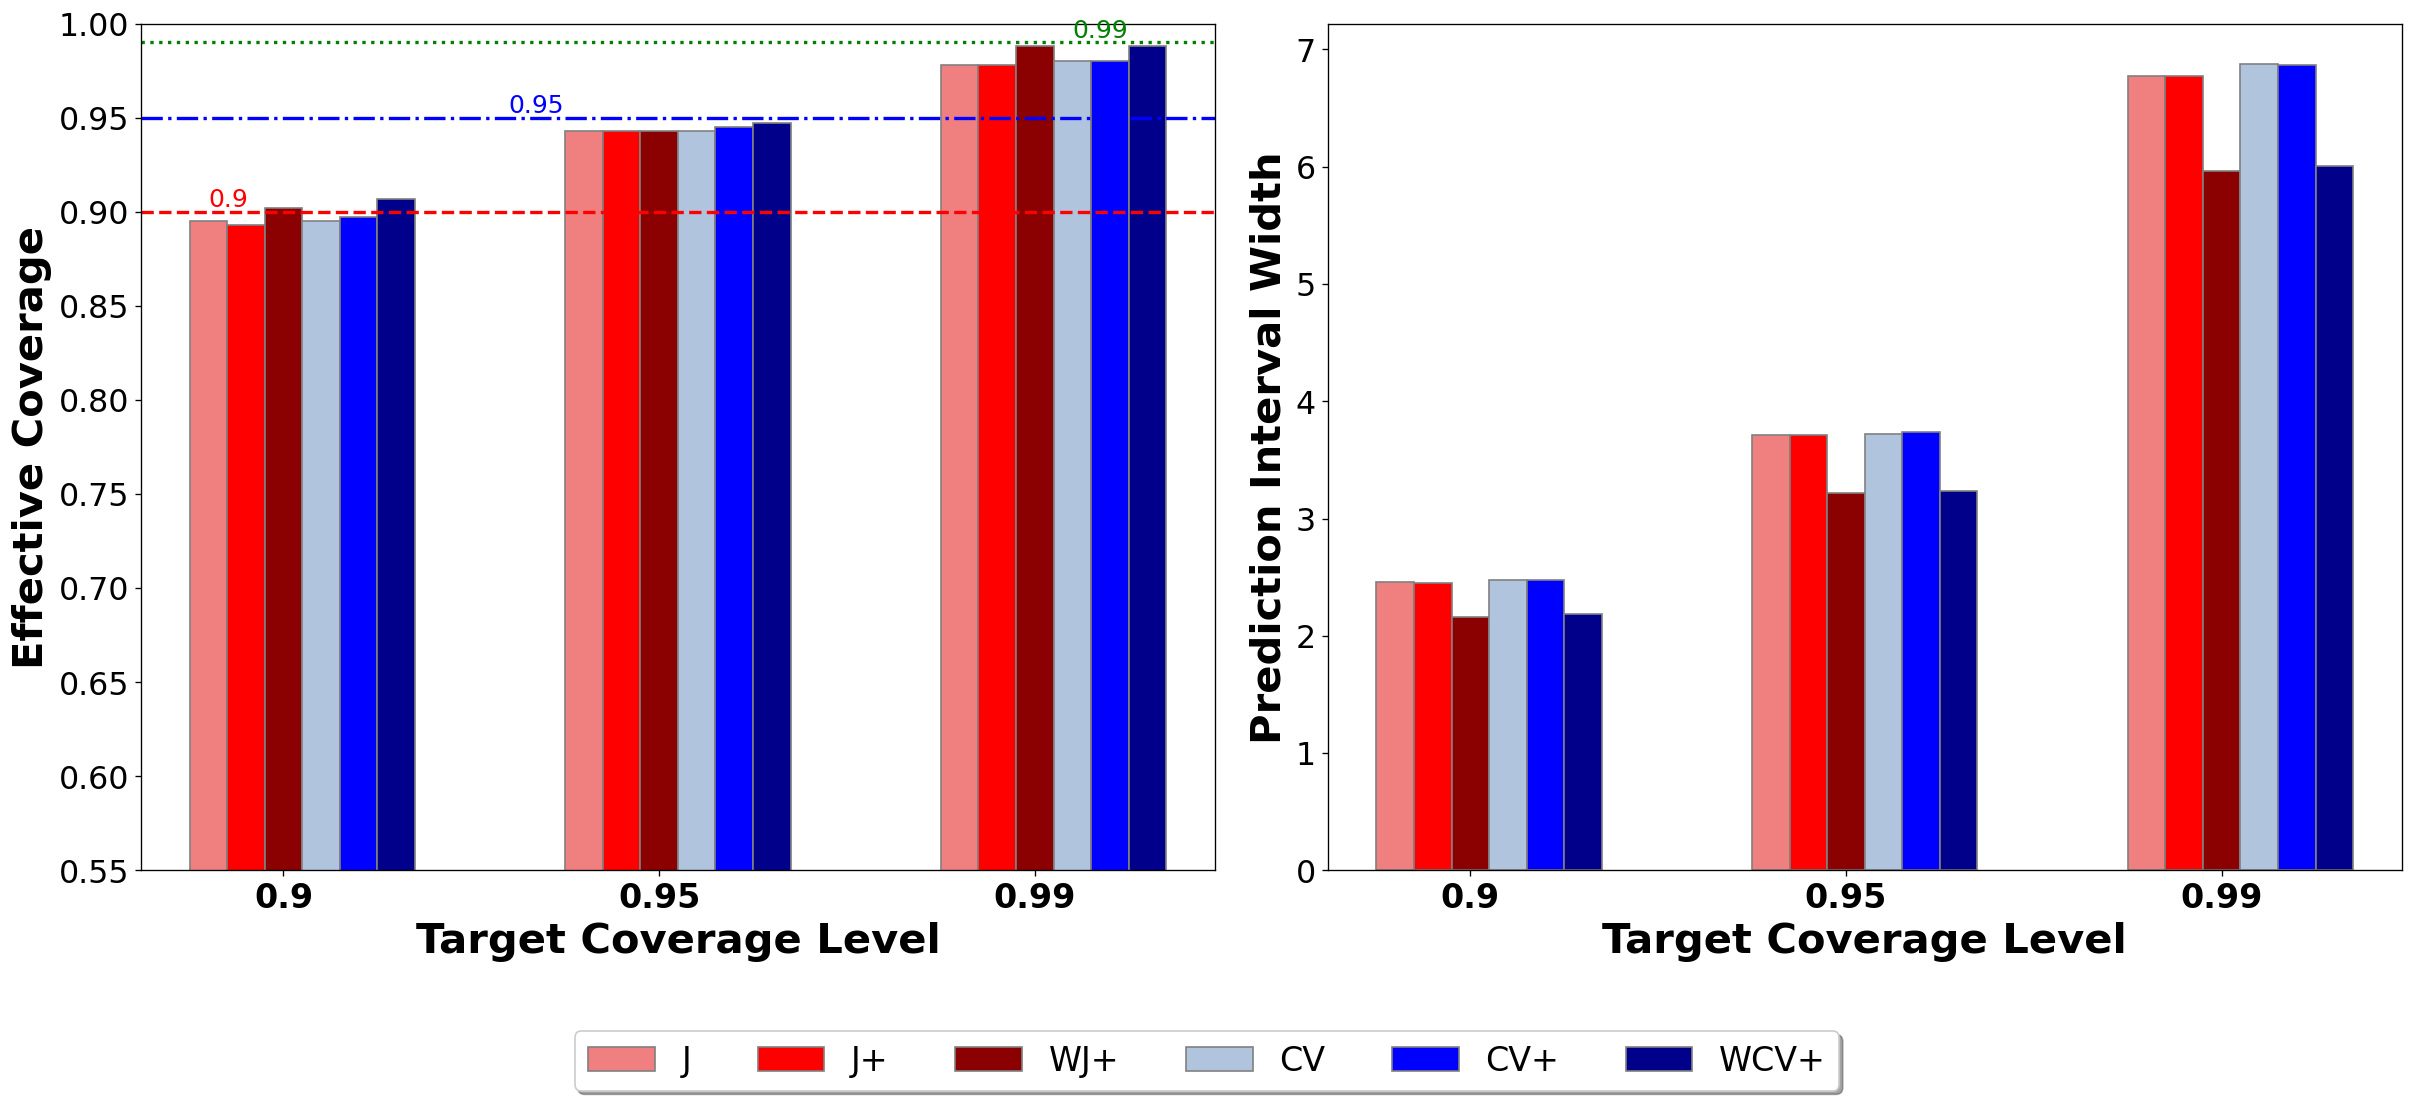

In [23]:
# Set the size of y-axis tick labels
plt.rc('ytick', labelsize=19)

# Set the width of each bar
barWidth = 0.1

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 8), constrained_layout=True)

# Set the position of bars on the X-axis for each subplot
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

# Make the plot for 'Effective Coverage' metric
ax[0].bar(br1, [results['J'][0][0][1], results['J'][1][0][1], results['J'][2][0][1]], color='lightcoral',
          width=barWidth, edgecolor='grey', label='J')
ax[0].bar(br2, [results['J+'][0][0][1], results['J+'][1][0][1], results['J+'][2][0][1]], color='r',
          width=barWidth, edgecolor='grey', label='J+')
ax[0].bar(br3, [results['WJ+'][0][0][1], results['WJ+'][1][0][1], results['WJ+'][2][0][1]], color='darkred',
          width=barWidth, edgecolor='grey', label='WJ+')
ax[0].bar(br4, [results['CV'][0][0][1], results['CV'][1][0][1], results['CV'][2][0][1]], color='lightsteelblue',
          width=barWidth, edgecolor='grey', label='CV')

ax[0].bar(br5, [results['CV+'][0][0][1], results['CV+'][1][0][1], results['CV+'][2][0][1]], color='b',
          width=barWidth, edgecolor='grey', label='CV+')
ax[0].bar(br6, [results['WCV+'][0][0][1], results['WCV+'][1][0][1], results['WCV+'][2][0][1]], color='darkblue',
          width=barWidth, edgecolor='grey', label='WCV+')

# Add horizontal lines and text annotations for target coverage levels
ax[0].axhline(y=0.9, linestyle="--", color='r')
ax[0].axhline(y=0.95, linestyle="-.", color='b')
ax[0].axhline(y=0.99, linestyle=':', color='g')
ax[0].text(0.001, 0.9, "0.9", verticalalignment='bottom', horizontalalignment='left', color='r', fontsize=15)
ax[0].text(0.8, 0.95, "0.95", verticalalignment='bottom', horizontalalignment='left', color='b', fontsize=15)
ax[0].text(2.3, 0.99, "0.99", verticalalignment='bottom', horizontalalignment='left', color='g', fontsize=15)

# Set labels, ticks, and limits for the 'Effective Coverage' subplot
ax[0].set_ylabel('Effective Coverage', fontweight='bold', fontsize=25)
ax[0].set_xlabel('Target Coverage Level', fontweight='bold', fontsize=25)
ax[0].set_xticks([r + 2 * barWidth for r in range(3)])
ax[0].set_xticklabels(['0.9', '0.95', '0.99'], fontweight='bold', fontsize=20)
ax[0].set_ylim([0.55, 1])

# Make the plot for 'Prediction Interval Width' metric
ax[1].bar(br1, [results['J'][0][0][2], results['J'][1][0][2], results['J+'][2][0][2]], color='lightcoral',
          width=barWidth, edgecolor='grey')
ax[1].bar(br2, [results['J+'][0][0][2], results['J+'][1][0][2], results['J+'][2][0][2]], color='r',
          width=barWidth, edgecolor='grey', label='CV+ PolyRidge')
ax[1].bar(br3, [results['WJ+'][0][0][2], results['WJ+'][1][0][2], results['WJ+'][2][0][2]], color='darkred',
          width=barWidth, edgecolor='grey', label='CV+ XGB')
ax[1].bar(br4, [results['CV'][0][0][2], results['CV'][1][0][2], results['CV'][2][0][2]], color='lightsteelblue',
          width=barWidth, edgecolor='grey')

ax[1].bar(br5, [results['CV+'][0][0][2], results['CV+'][1][0][2], results['CV+'][2][0][2]], color='b',
          width=barWidth, edgecolor='grey', label='CV+ MLP')
ax[1].bar(br6, [results['WCV+'][0][0][2], results['WCV+'][1][0][2], results['WCV+'][2][0][2]], color='darkblue',
          width=barWidth, edgecolor='grey', label='GPR')

# Set labels, ticks, and limits for the 'Prediction Interval Width' subplot
ax[1].set_ylabel('Prediction Interval Width', fontweight='bold', fontsize=25)
ax[1].set_xlabel('Target Coverage Level', fontweight='bold', fontsize=25)
ax[1].set_xticks([r + 2 * barWidth for r in range(3)])
ax[1].set_xticklabels(['0.9', '0.95', '0.99'], fontweight='bold', fontsize=20)

# Add the legend for the first subplot to the upper center of the figure
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=8, fontsize=20)

# Show the plot
plt.show()


 this code calculates the coverage and width for each strategy's prediction intervals using the sorted y_test values and the corresponding lower and upper bounds of the prediction intervals for each strategy. The results are stored in the dictionaries coverage and width.

In [32]:
# Extract the sorted y_test values from the sorted DataFrame 'a_sort'
y_test = a_sort.y_test.values

# Initialize dictionaries to store the coverage and width values for each strategy
r = {}
coverage = {}
width = {}

# Store the lower and upper bounds of the prediction intervals for each strategy in the 'r' dictionary
r['J'] = np.array(a_sort[['j_5low', 'j_5up']])
r['J+'] = np.array(a_sort[['j_P_5low', 'j_P_5up']])
r['WJ+'] = np.array(a_sort[['Wj_5low', 'Wj_5up']])
r['CV'] = np.array(a_sort[['CV_5low', 'CV_5up']])
r['CV+'] = np.array(a_sort[['CV_P_5low', 'CV_P_5up']])
r['WCV+'] = np.array(a_sort[['WCV_5low', 'WCV_5up']])

# Compute the coverage and width for each strategy
names = ['J', 'J+', 'WJ+', 'CV', 'CV+', 'WCV+']
for name in names:
    # Compute coverage using regression_coverage_score function
    coverage[name] = round(regression_coverage_score(
        y_test, r[name][:, 0], r[name][:, 1]
    ), 3)
    
    # Compute width as the mean of upper and lower bounds of prediction intervals
    width[name] = (r[name][:, 1] - r[name][:, 0]).mean().round(3)


In [33]:
coverage

{'J': 0.943,
 'J+': 0.943,
 'WJ+': 0.943,
 'CV': 0.943,
 'CV+': 0.945,
 'WCV+': 0.947}

In [34]:
width

{'J': 3.709,
 'J+': 3.711,
 'WJ+': 3.214,
 'CV': 3.724,
 'CV+': 3.735,
 'WCV+': 3.233}

In [35]:
# Number of incorrect prediction intervals
# missed={}
# missed['J']=34
# missed['J+']=34
# missed['WJ+']=34

# missed['CV']=34
# missed['CV+']=33
# missed['WCV+']=32


This code creates a 2x3 grid of subplots and plots the prediction intervals for each conformal method in each subplot. It also displays a legend for the first four subplots and sets the axes labels and tick label sizes appropriately.

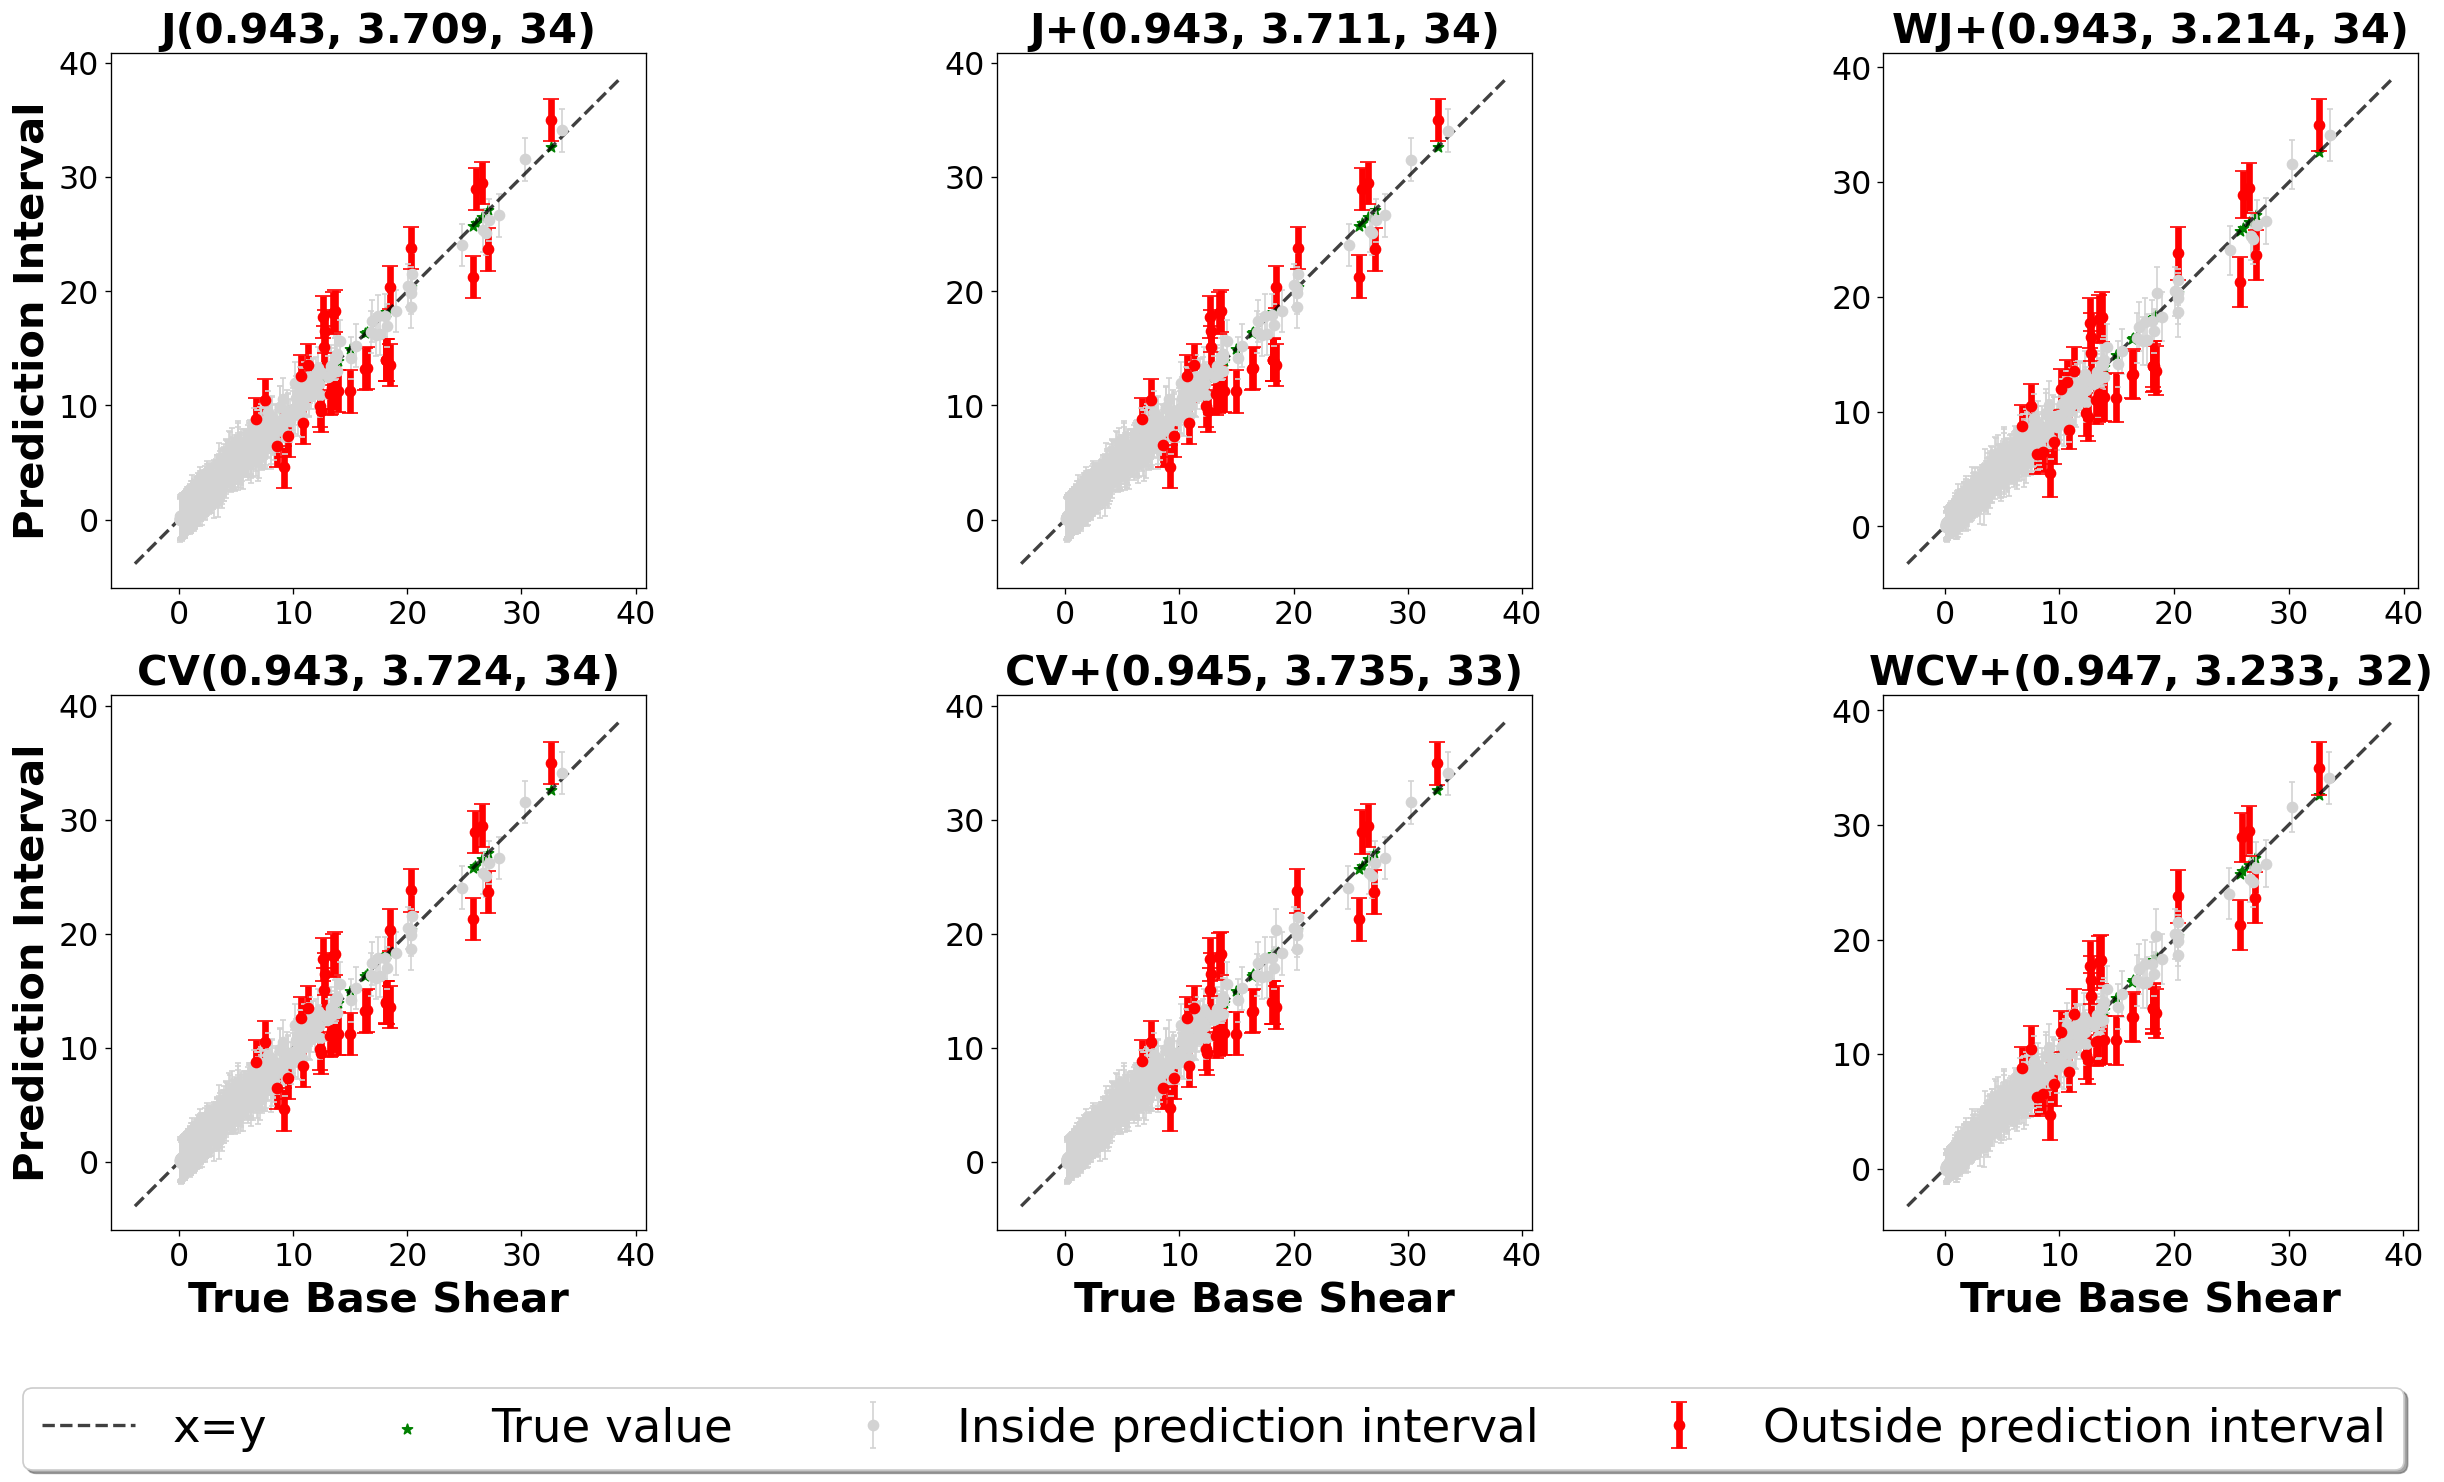

In [37]:
# Set the font size for x-axis and y-axis tick labels
plt.rc('xtick', labelsize=19)
plt.rc('ytick', labelsize=19)

# Set the font size for axes labels and titles
plt.rc('axes', labelsize=20, titlesize=16)

# Set the percentage of observations to plot
perc_obs_plot = 1

# Randomly select a subset of observations to plot
num_plots = rng.choice(len(y_test), int(perc_obs_plot * len(y_test)), replace=False)

# Create a 2x3 subplot grid for plotting the prediction intervals
fig, axs = plt.subplots(2, 3, figsize=(27, 13))

# Define the coordinates of each subplot in the grid
coords = [axs[0, 0], axs[0, 1], axs[0, 2], axs[1, 0], axs[1, 1], axs[1, 2]]

# Loop through each conformal method (strategy) and its corresponding subplot
for i, (name, coord) in enumerate(zip(names, coords)):
    # Call the plot_tr_PI function to plot the prediction intervals
    plot_tr_PI(
        name,
        coord,
        y_test,
        r[name].mean(axis=1).ravel(),
        r[name][:, 0],
        r[name][:, 1],
        coverage[name],
        width[name],
        missed[name],
        num_plots
    )

# Get the legend handles and labels from all subplots
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(_, []) for _ in zip(*lines_labels)]

# Plot the legend using the handles and labels from the first 4 subplots
plt.legend(
    lines[:4], labels[:4],
    loc='upper center',
    bbox_to_anchor=(-1.25, -0.25),  # Adjust the position of the legend
    fancybox=True,
    shadow=True,
    ncol=4,  # Number of columns in the legend
    fontsize=28,
)

# Set y-axis labels for the first and second rows of subplots
axs[0, 0].set_ylabel("Prediction Interval", fontweight='bold', fontsize=25)
axs[1, 0].set_ylabel("Prediction Interval", fontweight='bold', fontsize=25)

# Set x-axis labels for the second row of subplots
axs[1, 0].set_xlabel("True Base Shear", fontweight='bold', fontsize=25)
axs[1, 1].set_xlabel("True Base Shear", fontweight='bold', fontsize=25)
axs[1, 2].set_xlabel("True Base Shear", fontweight='bold', fontsize=25)

# Display the plot
plt.show()


This code analyzes the conditional coverage and prediction interval width for different bins of the target values (y_test). It computes the coverage or width for each bin and each conformal method (CV, CV+, WCV+) and plots the results as bar charts. The coverage is compared against the desired level of 0.95 by adding a dashed line, and the legend is appropriately placed in the first plot.

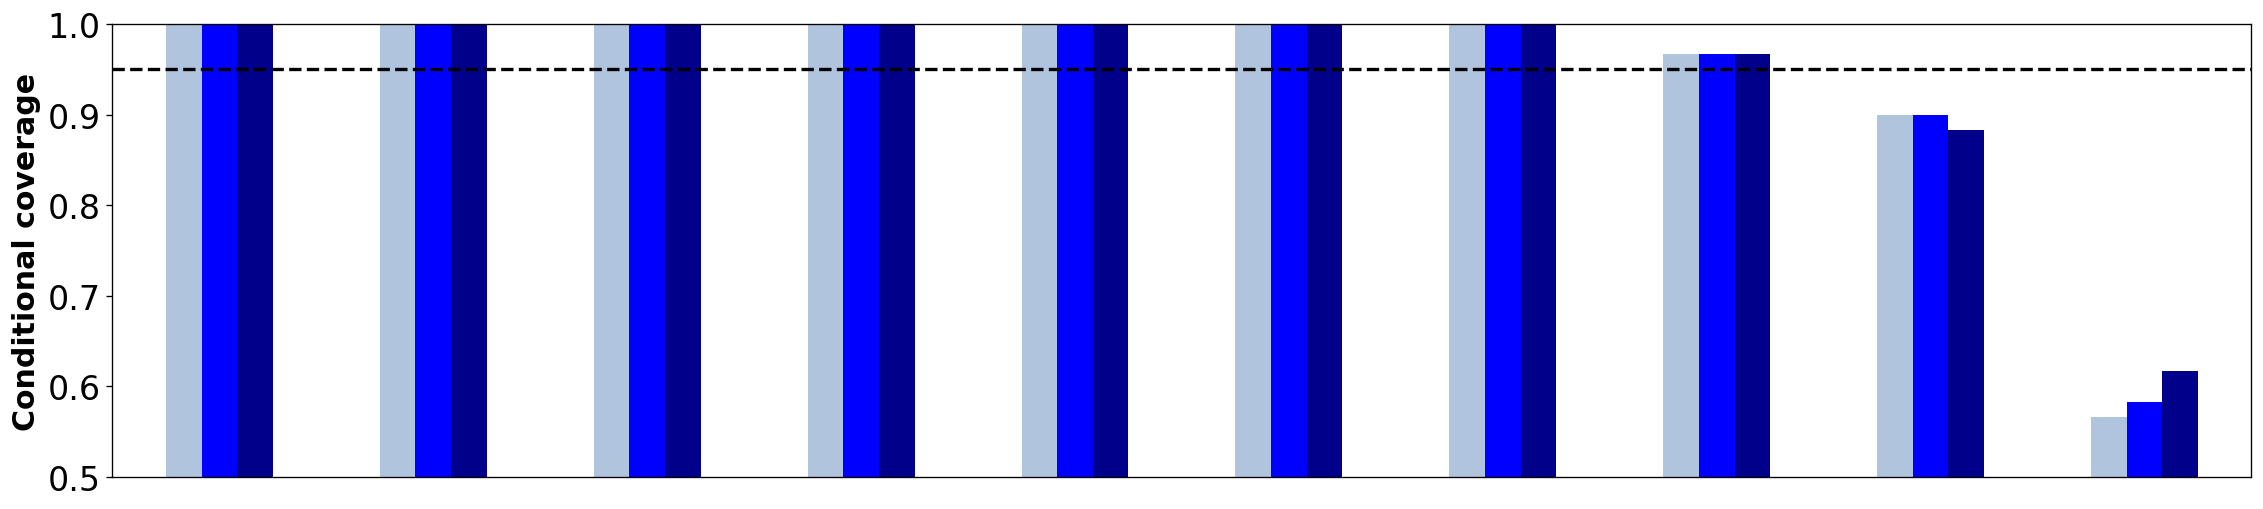

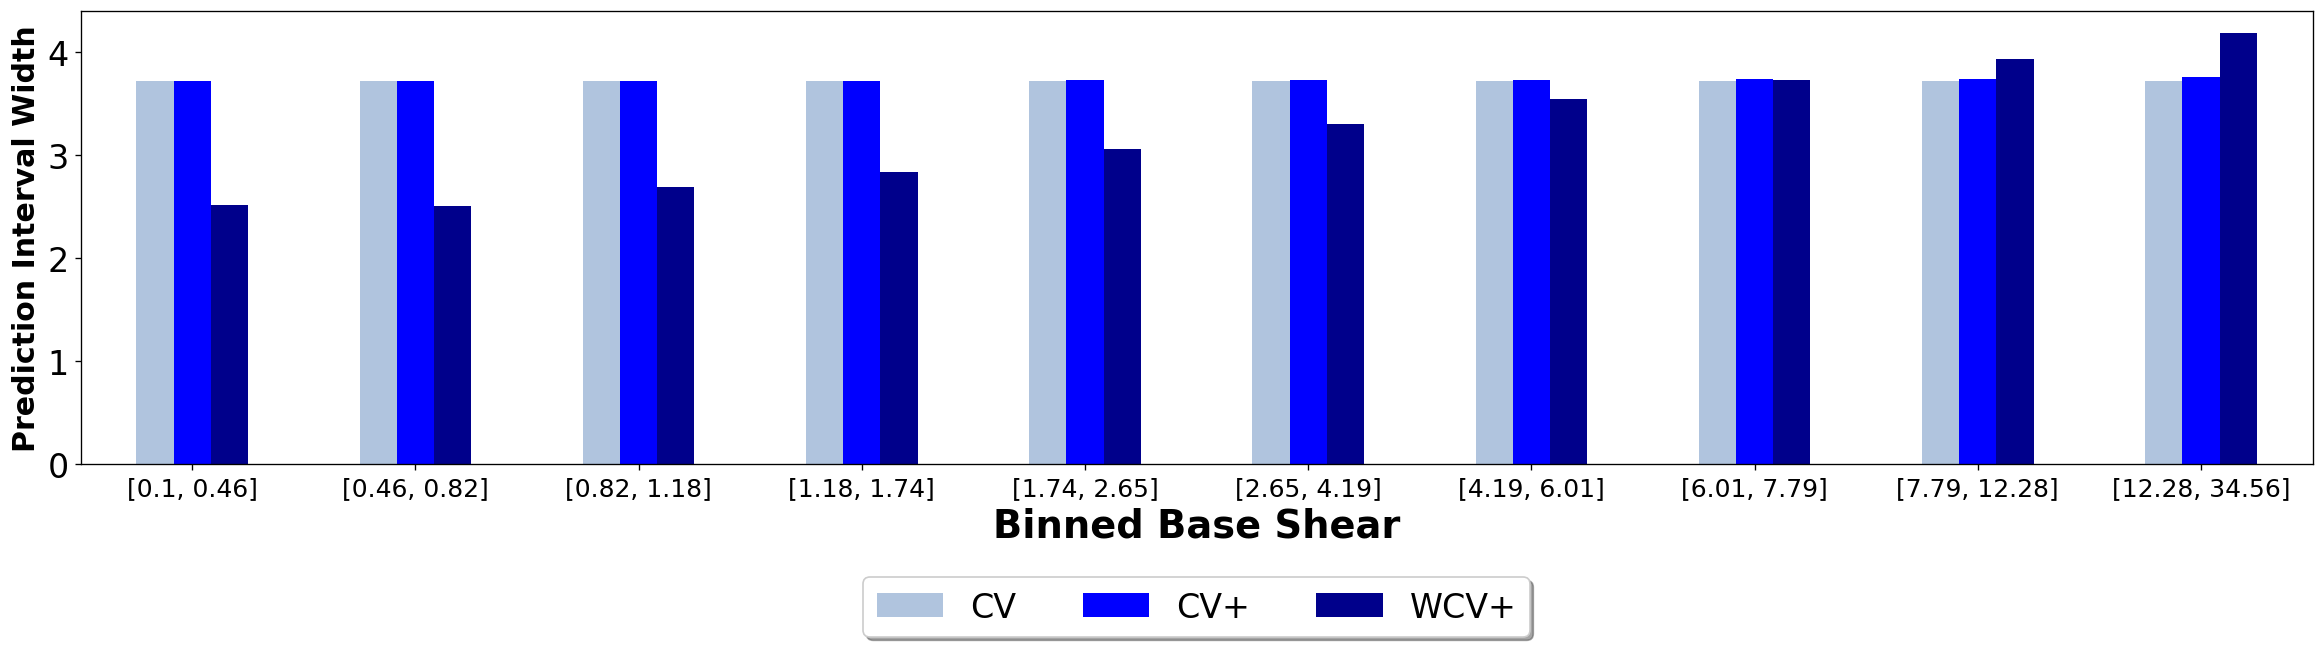

In [30]:
# Extract the true target values (y_test) and prediction intervals (r) for selected conformal methods
y_testt = a_sort.y_test.values
r = {}
r['CV'] = np.array(a_sort[['CV_5low', 'CV_5up']])
r['CV+'] = np.array(a_sort[['CV_P_5low', 'CV_P_5up']])
r['WCV+'] = np.array(a_sort[['WCV_5low', 'WCV_5up']])

# Define the list of conformal method names to analyze
names = ['CV', 'CV+', 'WCV+']

# Define the bins based on percentiles of target values (0.1, 0.2, ..., 0.9)
bins = list(np.arange(0, 1, 0.1))

# Plot the conditional coverage for different bins
mpl.rc('ytick', labelsize=20)
bin_data = bins_cov("coverage", y_testt, r, a_sort, names, bins)
bin_data.T.plot.bar(figsize=(23, 5), color=['lightsteelblue', 'b', 'darkblue'])
plt.axhline(0.95, ls="--", color="k")  # Add a dashed line at 0.95 coverage level
plt.ylabel("Conditional coverage", fontweight='bold', fontsize=18)
plt.xticks(rotation=345)
plt.xticks([])
plt.ylim(0.5, 1.0)  # Set y-axis limits
legend = plt.legend(handles=[], labels=[])  # Remove legend
legend.remove()
plt.show()

# Plot the prediction interval width for different bins
mpl.rc('ytick', labelsize=20)
mpl.rc('xtick', labelsize=15)
bin_data = bins_cov("width", y_testt, r, a_sort, names, bins)
binned_data.T.plot.bar(figsize=(24, 5), color=['lightsteelblue', 'b', 'darkblue'])
plt.ylabel("Prediction Interval Width", fontweight='bold', fontsize=18)
plt.xlabel("Binned Base Shear", fontweight='bold', fontsize=23)
plt.xticks(rotation=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=True, ncol=5, fontsize=20, borderaxespad=0.)  # Add legend
plt.show()
